In [1]:
import pandas as pd
import re
import string
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import nltk.data
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [2]:
from google.colab import files
uploaded = files.upload()

Saving articles.csv to articles.csv


In [3]:
print (uploaded['articles.csv'][:200].decode('utf-8') + '...')

title,text,subject,label
 Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead...


In [4]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['articles.csv'].decode('utf-8')))
df

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",World News,0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,World News,0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,World News,0


In [5]:
#Downloading nltk StopWords and Wordnet 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
# Convert to lowercase
df['text'] = df['text'].apply(lambda x: x.lower())
df['title'] = df['title'].apply(lambda x: x.lower())
df.head()

,title,text,subject,label
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,US News,1
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,US News,1
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",US News,1
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",US News,1
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,US News,1


In [7]:
# Remove punctuation
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

def punctuation_removal(title):
    all_list = [char for char in title if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['title'] = df['title'].apply(punctuation_removal)
df['text'] = df['text'].apply(punctuation_removal)
df.head(10)

,title,text,subject,label
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,US News,1
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,US News,1
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,US News,1
3,trump is so obsessed he even has obama’s name...,on christmas day donald trump announced that h...,US News,1
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,US News,1
5,racist alabama cops brutalize black boy while...,the number of cases of cops brutalizing and ki...,US News,1
6,fresh off the golf course trump lashes out at...,donald trump spent a good portion of his day a...,US News,1
7,trump said some insanely racist stuff inside ...,in the wake of yet another court decision that...,US News,1
8,former cia director slams trump over un bully...,many people have raised the alarm regarding th...,US News,1
9,watch brandnew protrump ad features so much a...,just when you might have thought we d get a br...,US News,1


In [8]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,text,subject,label
0,donald trump sends embarrassing new year’s eve...,donald trump wish americans happy new year lea...,US News,1
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,US News,1
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,US News,1
3,trump obsessed even obama’s name coded website...,christmas day donald trump announced would bac...,US News,1
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,US News,1
5,racist alabama cops brutalize black boy handcu...,number cases cops brutalizing killing people c...,US News,1
6,fresh golf course trump lashes fbi deputy dire...,donald trump spent good portion day golf club ...,US News,1
7,trump said insanely racist stuff inside oval o...,wake yet another court decision derailed donal...,US News,1
8,former cia director slams trump un bullying op...,many people raised alarm regarding fact donald...,US News,1
9,watch brandnew protrump ad features much kissi...,might thought get break watching people kiss d...,US News,1


In [9]:
import nltk
nltk.download('punkt')
df['title_tokenized'] = df['title'].apply(word_tokenize)
df['title_tokenized'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [donald, trump, sends, embarrassing, new, year...
1    [drunk, bragging, trump, staffer, started, rus...
2    [sheriff, david, clarke, becomes, internet, jo...
3    [trump, obsessed, even, obama, ’, s, name, cod...
4    [pope, francis, called, donald, trump, christm...
Name: title_tokenized, dtype: object

In [10]:
df['text_tokenized'] = df['text'].apply(word_tokenize)
df['text_tokenized'].head(5)

0    [donald, trump, wish, americans, happy, new, y...
1    [house, intelligence, committee, chairman, dev...
2    [friday, revealed, former, milwaukee, sheriff,...
3    [christmas, day, donald, trump, announced, wou...
4    [pope, francis, used, annual, christmas, day, ...
Name: text_tokenized, dtype: object

In [11]:
title_wordcount = df['title_tokenized'].apply(len)
df['title_tokenized']= title_wordcount
df['title_tokenized']

0        11
1         8
2        13
3        10
4         7
         ..
44893     8
44894     6
44895     5
44896     7
44897     7
Name: title_tokenized, Length: 44898, dtype: int64

In [12]:
text_wordcount = df['text_tokenized'].apply(len)
df['text_tokenized']= text_wordcount
df['text_tokenized']

0        287
1        179
2        339
3        265
4        211
        ... 
44893    266
44894     76
44895    174
44896    119
44897    140
Name: text_tokenized, Length: 44898, dtype: int64

In [13]:
df["Article"] = df["title"] + df["text"]
df.sample(frac = 1) #Shuffle 100%

df.label[df.label == 'REAL'] = 1
df.label[df.label == 'FAKE'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
df.head()

,title,text,subject,label,title_tokenized,text_tokenized,Article
0,donald trump sends embarrassing new year’s eve...,donald trump wish americans happy new year lea...,US News,1,11,287,donald trump sends embarrassing new year’s eve...
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,US News,1,8,179,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,US News,1,13,339,sheriff david clarke becomes internet joke thr...
3,trump obsessed even obama’s name coded website...,christmas day donald trump announced would bac...,US News,1,10,265,trump obsessed even obama’s name coded website...
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,US News,1,7,211,pope francis called donald trump christmas spe...


In [15]:
def wordpre(title):
    title = title.lower()
    title = re.sub('\[.*?\]', '', title)
    title = re.sub("\\W"," ",title) # remove special chars
    title = re.sub('https?://\S+|www\.\S+', '', title)
    title = re.sub('<.*?>+', '', title)
    title = re.sub('[%s]' % re.escape(string.punctuation), '', title)
    title = re.sub('\n', '', title)
    title = re.sub('\w*\d\w*', '', title)
    
    return title

In [16]:
##  Applying the wordpre method to the dataset
df['Article']= df['Article'].apply(wordpre)

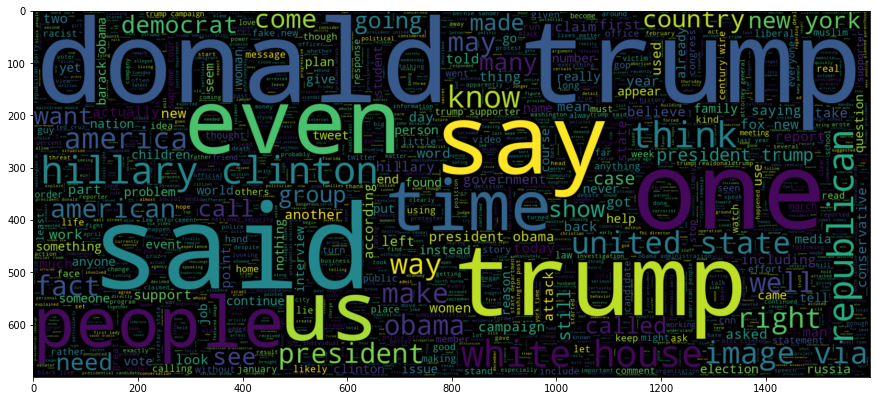

In [17]:
#word used in Real news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(df[df.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

In [18]:
df['Article']

0        donald trump sends embarrassing new year s eve...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes internet joke thr...
3        trump obsessed even obama s name coded website...
4        pope francis called donald trump christmas spe...
                               ...                        
44893    fully committed nato backs new us approach afg...
44894    lexisnexis withdrew two products chinese marke...
44895    minsk cultural hub becomes authoritiesminsk re...
44896    vatican upbeat possibility pope francis visiti...
44897    indonesia buy  billion worth russian jetsjakar...
Name: Article, Length: 44898, dtype: object

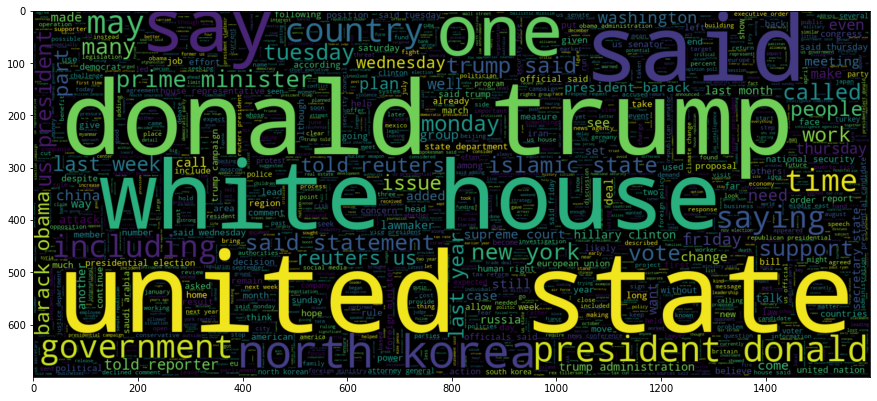

In [19]:
#word used in Fake news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(df[df.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

In [20]:
nltk.download('averaged_perceptron_tagger')
ndf = pd.DataFrame()
text = df['Article'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize)
from collections import Counter
for i in text: 
    N = nltk.pos_tag(i)
    C = Counter([j for i,j in N])
    S = pd.Series([C])
    N = pd.DataFrame.from_records(S, columns = S.sum().keys())
    ndf = pd.concat([ndf, N], ignore_index=True, sort=False)
ndf

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,JJ,NN,NNS,VBG,VBP,IN,RB,VB,VBZ,CD,JJR,RBR,VBN,NNP,VBD,WP,FW,MD,PRP,CC,JJS,DT,RP,RBS,EX,NNPS,WRB,UH,WDT,WP$,PRP$,POS,PDT,TO,'',SYM,$
0,55.0,84.0,30.0,8.0,18.0,5.0,17.0,8.0,9.0,2.0,2.0,2.0,2.0,4.0,8.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37.0,80.0,15.0,10.0,8.0,2.0,8.0,2.0,2.0,3.0,1.0,NaN,5.0,NaN,10.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55.0,130.0,32.0,7.0,24.0,9.0,11.0,3.0,5.0,1.0,NaN,3.0,8.0,5.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28.0,115.0,13.0,9.0,8.0,5.0,19.0,7.0,7.0,NaN,2.0,NaN,8.0,4.0,13.0,NaN,NaN,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36.0,68.0,32.0,3.0,12.0,5.0,9.0,12.0,5.0,2.0,1.0,NaN,10.0,NaN,17.0,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44884,53.0,87.0,33.0,10.0,11.0,5.0,14.0,6.0,3.0,NaN,1.0,NaN,11.0,NaN,18.0,NaN,NaN,3.0,7.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44885,20.0,32.0,7.0,1.0,3.0,NaN,1.0,2.0,NaN,3.0,NaN,1.0,3.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44886,35.0,54.0,26.0,2.0,11.0,3.0,8.0,2.0,5.0,1.0,NaN,1.0,4.0,1.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44887,32.0,42.0,9.0,6.0,4.0,1.0,8.0,5.0,NaN,1.0,NaN,NaN,4.0,1.0,9.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
ndf.fillna(0)

,JJ,NN,NNS,VBG,VBP,IN,RB,VB,VBZ,CD,JJR,RBR,VBN,NNP,VBD,WP,FW,MD,PRP,CC,JJS,DT,RP,RBS,EX,NNPS,WRB,UH,WDT,WP$,PRP$,POS,PDT,TO,'',SYM,$
0,55.0,84.0,30.0,8.0,18.0,5.0,17.0,8.0,9.0,2.0,2.0,2.0,2.0,4.0,8.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37.0,80.0,15.0,10.0,8.0,2.0,8.0,2.0,2.0,3.0,1.0,0.0,5.0,0.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55.0,130.0,32.0,7.0,24.0,9.0,11.0,3.0,5.0,1.0,0.0,3.0,8.0,5.0,18.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28.0,115.0,13.0,9.0,8.0,5.0,19.0,7.0,7.0,0.0,2.0,0.0,8.0,4.0,13.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36.0,68.0,32.0,3.0,12.0,5.0,9.0,12.0,5.0,2.0,1.0,0.0,10.0,0.0,17.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44884,53.0,87.0,33.0,10.0,11.0,5.0,14.0,6.0,3.0,0.0,1.0,0.0,11.0,0.0,18.0,0.0,0.0,3.0,7.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44885,20.0,32.0,7.0,1.0,3.0,0.0,1.0,2.0,0.0,3.0,0.0,1.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44886,35.0,54.0,26.0,2.0,11.0,3.0,8.0,2.0,5.0,1.0,0.0,1.0,4.0,1.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44887,32.0,42.0,9.0,6.0,4.0,1.0,8.0,5.0,0.0,1.0,0.0,0.0,4.0,1.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
ndf.nunique().sort_values()

$         1
''        1
SYM       1
PDT       2
POS       3
WRB       3
RBS       4
UH        5
PRP$      5
EX        5
WDT       6
TO        6
RP        7
WP$       7
CC        8
NNPS      8
WP        9
RBR       9
JJS      16
DT       17
JJR      18
NNP      22
FW       23
MD       40
PRP      44
CD       44
VBZ      55
IN       59
VB       62
VBN      81
VBG     115
VBP     116
RB      136
VBD     148
NNS     233
JJ      327
NN      488
dtype: int64

In [23]:
ndf2 = ndf[['NN','JJ','NNS','VBD','RB','VBP','VBG','VBN','VB','IN','VBZ']]
ndf2['nouns'] = ndf2['NN'] + ndf2['NNS']
ndf2['verbs'] = ndf2['VBD'] + ndf2['VBG'] + ndf2['VBP'] + ndf2['VBN'] + ndf2['VB'] + ndf2['VBZ']
ndf2 = ndf2.rename(columns = {'JJ': 'adjectives', 'IN': 'prepositions', 'RB': 'adverbs'})
ndf2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NN,adjectives,NNS,VBD,adverbs,VBP,VBG,VBN,VB,prepositions,VBZ,nouns,verbs
0,84.0,55.0,30.0,8.0,17.0,18.0,8.0,2.0,8.0,5.0,9.0,114.0,53.0
1,80.0,37.0,15.0,10.0,8.0,8.0,10.0,5.0,2.0,2.0,2.0,95.0,37.0
2,130.0,55.0,32.0,18.0,11.0,24.0,7.0,8.0,3.0,9.0,5.0,162.0,65.0
3,115.0,28.0,13.0,13.0,19.0,8.0,9.0,8.0,7.0,5.0,7.0,128.0,52.0
4,68.0,36.0,32.0,17.0,9.0,12.0,3.0,10.0,12.0,5.0,5.0,100.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44884,87.0,53.0,33.0,18.0,14.0,11.0,10.0,11.0,6.0,5.0,3.0,120.0,59.0
44885,32.0,20.0,7.0,7.0,1.0,3.0,1.0,3.0,2.0,NaN,NaN,39.0,NaN
44886,54.0,35.0,26.0,19.0,8.0,11.0,2.0,4.0,2.0,3.0,5.0,80.0,43.0
44887,42.0,32.0,9.0,9.0,8.0,4.0,6.0,4.0,5.0,1.0,NaN,51.0,NaN


In [24]:
ndf3 = ndf2[['adjectives','adverbs','prepositions','nouns','verbs']]
ndf3

,adjectives,adverbs,prepositions,nouns,verbs
0,55.0,17.0,5.0,114.0,53.0
1,37.0,8.0,2.0,95.0,37.0
2,55.0,11.0,9.0,162.0,65.0
3,28.0,19.0,5.0,128.0,52.0
4,36.0,9.0,5.0,100.0,59.0
...,...,...,...,...,...
44884,53.0,14.0,5.0,120.0,59.0
44885,20.0,1.0,NaN,39.0,NaN
44886,35.0,8.0,3.0,80.0,43.0
44887,32.0,8.0,1.0,51.0,NaN


In [25]:
ndf3.fillna(0)

,adjectives,adverbs,prepositions,nouns,verbs
0,55.0,17.0,5.0,114.0,53.0
1,37.0,8.0,2.0,95.0,37.0
2,55.0,11.0,9.0,162.0,65.0
3,28.0,19.0,5.0,128.0,52.0
4,36.0,9.0,5.0,100.0,59.0
...,...,...,...,...,...
44884,53.0,14.0,5.0,120.0,59.0
44885,20.0,1.0,0.0,39.0,0.0
44886,35.0,8.0,3.0,80.0,43.0
44887,32.0,8.0,1.0,51.0,0.0


In [26]:
article_wordcount = df['Article'].apply(len)
article_wordcount
df['article_wordcount']= article_wordcount
df

,title,text,subject,label,title_tokenized,text_tokenized,Article,article_wordcount
0,donald trump sends embarrassing new year’s eve...,donald trump wish americans happy new year lea...,US News,1,11,287,donald trump sends embarrassing new year s eve...,1842
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,US News,1,8,179,drunk bragging trump staffer started russian c...,1452
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,US News,1,13,339,sheriff david clarke becomes internet joke thr...,2315
3,trump obsessed even obama’s name coded website...,christmas day donald trump announced would bac...,US News,1,10,265,trump obsessed even obama s name coded website...,1781
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,US News,1,7,211,pope francis called donald trump christmas spe...,1517
...,...,...,...,...,...,...,...,...
44893,fully committed nato backs new us approach afg...,brussels reuters nato allies tuesday welcomed ...,World News,0,8,266,fully committed nato backs new us approach afg...,2026
44894,lexisnexis withdrew two products chinese market,london reuters lexisnexis provider legal regul...,World News,0,6,76,lexisnexis withdrew two products chinese marke...,634
44895,minsk cultural hub becomes authorities,minsk reuters shadow disused sovietera factori...,World News,0,5,174,minsk cultural hub becomes authoritiesminsk re...,1375
44896,vatican upbeat possibility pope francis visiti...,moscow reuters vatican secretary state cardina...,World News,0,7,119,vatican upbeat possibility pope francis visiti...,904


In [27]:
df_dummies = pd.get_dummies(df['subject'])
df_dummies

,US News,World News
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
44893,0,1
44894,0,1
44895,0,1
44896,0,1
